# MNIST dataset visualisation

Dataset versions, in increasing difficulty:

0. `onehot-bags` (not in PDF file, but self-explanatory)
1. `mnist-bags`
2. `multi-mnist-bags`
3. `mnist-collage`
4. `mnist-patch-collage`

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import itertools

from mil.data.mnist import MNISTBags, OneHotMNISTBags

## 0. `onehot-bags`

This dataset is a simplified version of `mnist-bags` (or `multi-mnist-bags`), where the instances are one-hot encoded 10-dimensional vectors representing the digits as opposed to the actual MNIST pictures.

In [79]:
ds = OneHotMNISTBags(target_number = 9, # target number
                     min_instances_per_target = 1, # 1 instance of a "9" suffices to label a bag as positive
                     num_digits = 10, # sample from all 10 MNIST digits
                     mean_bag_length = 10, # mean bag length
                     var_bag_length = 2, # variance of bag length
                     num_bags = 250, # number of bags
                     seed = 1,
                     train = True)
loader = torch.utils.data.DataLoader(ds, batch_size = 1, shuffle = True, collate_fn=lambda x: x[0])

for ohe, bag_label, instance_labels in itertools.islice(loader, 10):
    print(f"{'positive' if bag_label else 'negative'} bag: {str(instance_labels.numpy()):30s} first instance ({instance_labels[0]}): {ohe[0].numpy().astype(int)}")

positive bag: [2 8 6 4 9 0 5 5 6 1 7 6 5]    first instance (2): [0 0 1 0 0 0 0 0 0 0]
positive bag: [7 8 8 9 4 9 6 2 3 4 3 5]      first instance (7): [0 0 0 0 0 0 0 1 0 0]
positive bag: [8 2 3 1 2 7 2 6 0 9]          first instance (8): [0 0 0 0 0 0 0 0 1 0]
positive bag: [8 9 0 9]                      first instance (8): [0 0 0 0 0 0 0 0 1 0]
negative bag: [4 3 6 3 6 7 5 0 6 3]          first instance (4): [0 0 0 0 1 0 0 0 0 0]
positive bag: [6 2 9 2 9 0 1 2 4 6 0 6]      first instance (6): [0 0 0 0 0 0 1 0 0 0]
negative bag: [2 0 8 0 2 3 4 2 8]            first instance (2): [0 0 1 0 0 0 0 0 0 0]
negative bag: [6 7 2 8 4 8 1 6 0 2 6]        first instance (6): [0 0 0 0 0 0 1 0 0 0]
negative bag: [7 0 8 1 8 4 5 5 2 8 2 1 2]    first instance (7): [0 0 0 0 0 0 0 1 0 0]
negative bag: [1 0 7 5 5 5 3 1 7 4 4]        first instance (1): [0 1 0 0 0 0 0 0 0 0]


# 1. `mnist-bags`

In [33]:
ds = MNISTBags(target_number = 9, # target number
               min_instances_per_target = 1, # 1 instance of a "9" suffices to label a bag as positive
               num_digits = 10, # sample from all 10 MNIST digits
               mean_bag_length = 10, # mean bag length
               var_bag_length = 2, # variance of bag length
               num_bags = 250, # number of bags
               seed = 1,
               train = True)
loader = torch.utils.data.DataLoader(ds, batch_size = 1, shuffle = True, collate_fn=lambda x: x[0])
it = iter(loader)

Text(0.5, 0.98, 'Bag label: False')

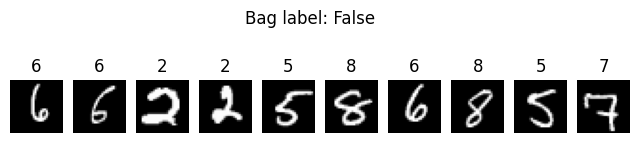

In [64]:
# Visualise a single bag (rerun this cell to see another bag)
instances, bag_label, instance_labels = next(it)

fig, axs = plt.subplots(1, instances.shape[0], figsize=(8, 2))
for instance, instance_label, ax in zip(instances, instance_labels, axs):
    ax.imshow(instance.squeeze().numpy(), cmap="gray")
    ax.set_axis_off()
    ax.set_title(f"{instance_label}")
plt.gcf().suptitle(f"Bag label: {bag_label.item() == 1.}")

# 2. `multi-mnist-bags`

This is the same as `mnist-bags` but we set `target_number = (7, 9)` (a tuple instead of just an int).

In [43]:
ds = MNISTBags(target_number = (7, 9), # target number
               min_instances_per_target = 1, # 1 instance of a "9" suffices to label a bag as positive
               num_digits = 10, # sample from all 10 MNIST digits
               mean_bag_length = 10, # mean bag length
               var_bag_length = 2, # variance of bag length
               num_bags = 250, # number of bags
               seed = 1,
               train = True)
loader = torch.utils.data.DataLoader(ds, batch_size = 1, shuffle = True, collate_fn=lambda x: x[0])
it = iter(loader)

Text(0.5, 0.98, 'Bag label: False')

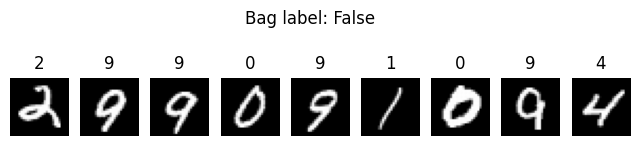

In [63]:
# Visualise a single bag (rerun this cell to see another bag)
instances, bag_label, instance_labels = next(it)

fig, axs = plt.subplots(1, instances.shape[0], figsize=(8, 2))
for instance, instance_label, ax in zip(instances, instance_labels, axs):
    ax.imshow(instance.squeeze().numpy(), cmap="gray")
    ax.set_axis_off()
    ax.set_title(f"{instance_label}")
plt.gcf().suptitle(f"Bag label: {bag_label.item() == 1.}")

# 3. `mnist-collage`